In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:/Users/ABA/Desktop/nikamooz/mainCourseSTuuf/dataset/housing.csv',names=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
dwell = data
dwell.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

## مثال داده پرت

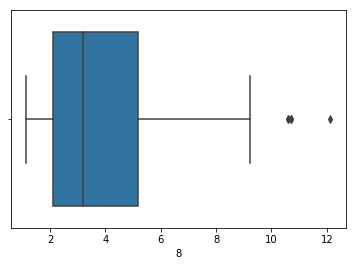

In [7]:
dwell
import seaborn as sns
sns.boxplot(x=dwell[8])

## بدون داده پرت

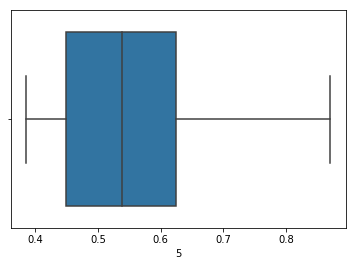

In [8]:
sns.boxplot(x=dwell[5])

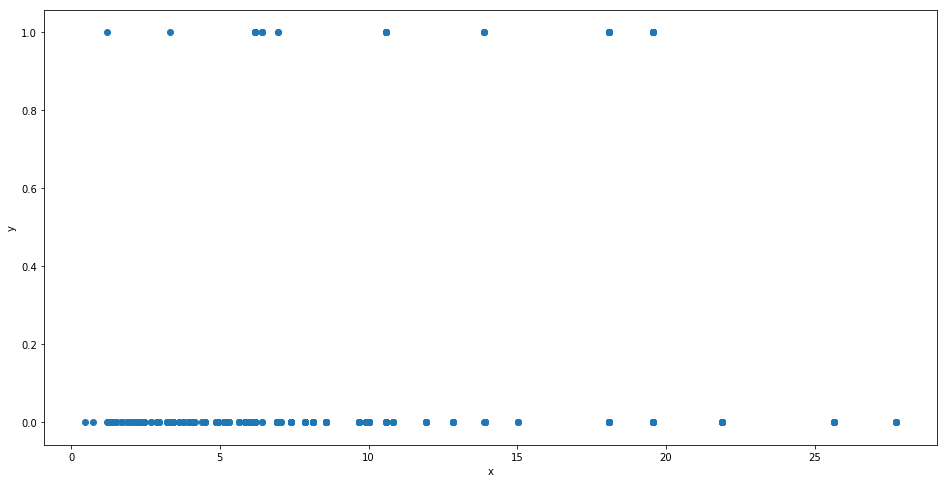

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dwell[3], dwell[4])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## دو خصیصه مربوط دیگر بیابید که بتوان با آن دادگان پرت را یافت

## Z-Score

In [13]:
from scipy import stats
import numpy as np
zScore = np.abs(stats.zscore(dwell))
zScore[2:4]

array([[0.63714543, 0.48772236, 0.59338101, 0.27259857, 0.74026221,
        1.28271368, 0.26581176, 0.55715988, 0.8678825 , 0.98732948,
        0.30309415, 0.39642699, 1.2087274 , 1.32424667],
       [0.63522909, 0.48772236, 1.30687771, 0.27259857, 0.83528384,
        1.01630251, 0.80988851, 1.07773662, 0.75292215, 1.10611514,
        0.1130321 , 0.41616284, 1.36151682, 1.18275795]])

In [16]:
print(np.where(zScore > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       377, 399, 406, 410, 411, 412, 412, 414, 415, 416, 418, 419, 423,
       424, 425, 426, 427, 429, 431, 436, 437, 438, 441, 443, 445, 447,
       450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  5,
       11, 11, 11, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11,  0,  0, 11,  0, 11, 11, 11, 11, 11, 11], dtype=int64)

## دربالا آرایه اول شامل شماره سطر و آرایه دوم شامل شماره ستون است

In [9]:
zScore[56][1]

3.160440923062437

In [10]:
zScore[102][11]

3.1344253279141

## حذف رکورد حاوی داده پرت

In [11]:
dwell.shape

(506, 14)

In [17]:
cleanDwell = dwell[(zScore < 3).all(axis=1)]
cleanDwell.shape

(414, 14)

## IQR

In [13]:
Q1 = dwell.quantile(0.25)
Q3 = dwell.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1       2.244818
2      12.500000
3      12.910000
4       0.000000
5       0.175000
6       0.738000
7      49.050000
8       3.088250
9      20.000000
10    387.000000
11      2.800000
12     20.847500
13     10.005000
14      7.975000
dtype: float64


In [14]:
boolean_dwell = (dwell < (Q1 - 1.5 * IQR)) |(dwell > (Q3 + 1.5 * IQR))
boolean_dwell

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## حذف رکورد حاوی داده پرت

In [18]:
boolean_dwell_out = dwell[~((dwell < (Q1 - 1.5 * IQR)) |(dwell > (Q3 + 1.5 * IQR))).any(axis=1)]
boolean_dwell_out.shape

NameError: name 'Q1' is not defined

## حذف با سخت گیری بیشتر

In [21]:
boolean_dwell_out = dwell[~((dwell < (Q1 - 2 * IQR)) |(dwell > (Q3 + 2 * IQR))).any(axis=1)]
boolean_dwell_out.shape

(305, 14)